### Libraries to install

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Constants

In [89]:
BYTES_TO_MB_DIV = 0.000001

### Function to check the memory usage of the dataframe

In [90]:
def df_mem_usage(df):
    print()
    mem = round(df.memory_usage().sum() * BYTES_TO_MB_DIV, 3) 
    print("Memory usage is " + str(mem) + " MB")

### Reading the dataset

In [91]:
%%time

cols = ['%%MatrixMarket','matrix','coordinate']

dtypes = {
    '%%MatrixMarket':'int32', 
    'matrix':'int16', 
    'coordinate':'int8'
}

df = pd.read_csv('data/netflix_mm', delim_whitespace=True, usecols=cols, dtype=dtypes, skiprows=range(1, 3))
df.columns = ['user_id', 'movie_id', 'rating']

print(df.head())
df_mem_usage(df)

   user_id  movie_id  rating
0        1         1       3
1        2         1       5
2        3         1       4
3        5         1       3
4        6         1       3

Memory usage is 693.505 MB
CPU times: user 21.5 s, sys: 2.16 s, total: 23.7 s
Wall time: 23.9 s


In [92]:
print(df.head())

   user_id  movie_id  rating
0        1         1       3
1        2         1       5
2        3         1       4
3        5         1       3
4        6         1       3


# EDA

### Check for missing ratings

In [93]:
(df['rating'] == 0).any()

False

### Total number of ratings in the dataset

In [94]:
num_ratings = len(df.index)

print(('This dataset contains {:,} ratings in total.').format(num_ratings))

This dataset contains 99,072,112 ratings in total.


### Total number of viewers in the dataset

In [95]:
num_viewers = len(pd.unique(df['user_id']))
  
print(('This dataset contains {:,} viewers in total.').format(num_viewers))

This dataset contains 480,189 viewers in total.


### Total number of movies in the dataset

In [96]:
num_movies = len(pd.unique(df['movie_id']))
  
print(('This dataset contains {:,} movies in total.').format(num_movies))

This dataset contains 17,770 movies in total.


### Average number of ratings per movie

In [97]:
avg_ratings_per_movie = round(num_ratings / num_movies)

print(('Each movies has on average {:,} ratings.').format(avg_ratings_per_movie))

Each movies has on average 5,575 ratings.


### Average number of ratings per viewer

In [98]:
avg_ratings_per_viewer = round(num_ratings / num_viewers)

print(('Each user has rated on average {:,} movies.').format(avg_ratings_per_viewer))

Each user has rated on average 206 movies.


### Checking the distribution of the number of ratings per movie

In [99]:
dist_ratings_movies = df.groupby('movie_id').size().sort_values()

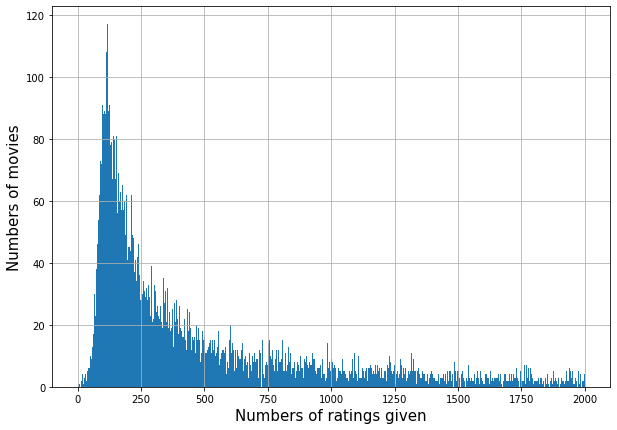

In [100]:
fig = plt.figure(figsize = (10,7))
ax = fig.gca()
dist_ratings_movies.hist(ax = ax, bins=1000, range=(0, 2000))

plt.xlabel("Numbers of ratings given", fontsize=15)  
plt.ylabel("Numbers of movies", fontsize=15)  
plt.show()

### Checking the distribution of the number of ratings per user

In [101]:
dist_ratings_user = df.groupby('user_id').size().sort_values()

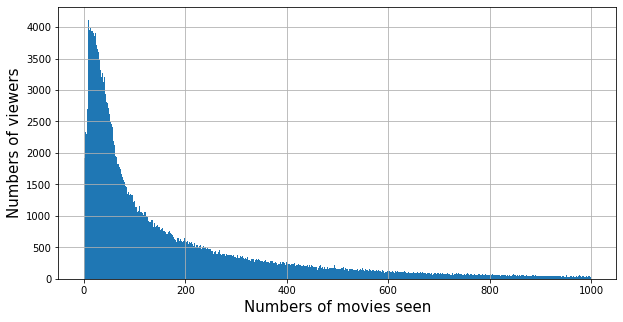

In [110]:
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
dist_ratings_user.hist(ax = ax, bins=1000, range=(0, 1000))

plt.xlabel("Numbers of movies seen", fontsize=15)  
plt.ylabel("Numbers of viewers", fontsize=15)

plt.savefig('images/dist.jpg', dpi=1500)
plt.show()

### Repartition of the grades

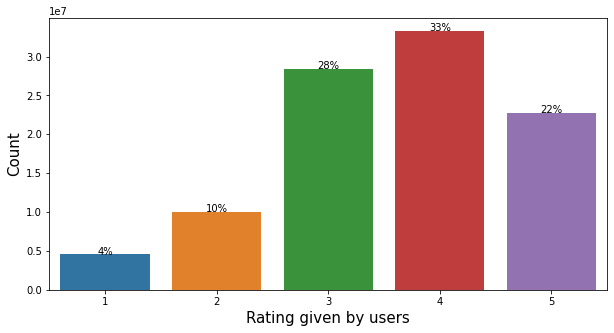

In [115]:
movie_ratings = sorted(df.rating.unique())

fig = plt.figure(figsize = (10,5))
ax = sns.countplot(x='rating', data=df, order=movie_ratings)

plt.xlabel("Rating given by users", fontsize=15)  
plt.ylabel("Count", fontsize=15)

patches = ax.patches
percentage = [4, 10, 28, 33, 22]

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.05
    ax.annotate('{}%'.format(percentage[i]), (x, y), ha='center')

plt.savefig('images/ratings.jpg', dpi=1500)
plt.show()

### Repartition of the ratings

In [104]:
ratings = df.rating.value_counts()

for rating in ratings.index:
    percentage = int(ratings[rating] / len(df.index) * 100)
    print(('Percentage of movies that were given a rating of {}: {} %').format(rating, percentage))

Percentage of movies that were given a rating of 4: 33 %
Percentage of movies that were given a rating of 3: 28 %
Percentage of movies that were given a rating of 5: 22 %
Percentage of movies that were given a rating of 2: 10 %
Percentage of movies that were given a rating of 1: 4 %


### Mean of ratings

In [118]:
print(df['rating'].mean())

3.603304257811724
